<a href="https://colab.research.google.com/github/MS-H2020/Open/blob/main/Test7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!cp "/content/drive/MyDrive/Colab Notebooks/data1.zip" .
!unzip data1.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/1/n_05256.jpg      
  inflating: __MACOSX/data/1/._n_05256.jpg  
  inflating: data/1/n_01024.jpg      
  inflating: __MACOSX/data/1/._n_01024.jpg  
  inflating: data/1/n_03155.jpg      
  inflating: __MACOSX/data/1/._n_03155.jpg  
  inflating: data/1/n_04389.jpg      
  inflating: __MACOSX/data/1/._n_04389.jpg  
  inflating: data/1/n_03380.jpg      
  inflating: __MACOSX/data/1/._n_03380.jpg  
  inflating: data/1/n_00845.jpg      
  inflating: __MACOSX/data/1/._n_00845.jpg  
  inflating: data/1/n_04410.jpg      
  inflating: __MACOSX/data/1/._n_04410.jpg  
  inflating: data/1/n_02075.jpg      
  inflating: __MACOSX/data/1/._n_02075.jpg  
  inflating: data/1/n_04362.jpg      
  inflating: __MACOSX/data/1/._n_04362.jpg  
  inflating: data/1/n_01232.jpg      
  inflating: __MACOSX/data/1/._n_01232.jpg  
  inflating: data/1/n_00892.jpg      
  inflating: __MACOSX/data/1/._n_00892.jpg  
  inflating: data/1/n_02049.jpg     

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator( rescale=1./255, # 255で割ることで正規化
                              featurewise_center = False,
                              samplewise_center = False,
                              featurewise_std_normalization = False,
                              samplewise_std_normalization = False,
                              zca_whitening = False,
                              rotation_range = 10,
                              #width_shift_range = 0.3,
                              #height_shift_range = 0.3,
                              horizontal_flip = True,
                              vertical_flip = False,
                              validation_split = 0.2
                            )

In [3]:
train_dir = './data'
BATCH_SIZE = 32

train_generator = datagen.flow_from_directory(
            train_dir,
            target_size=(256,256),
            batch_size=BATCH_SIZE,
            class_mode='categorical',
            shuffle=True,
            subset = "training"
  )

val_generator = datagen.flow_from_directory(
            train_dir,
            target_size=(256,256),
            batch_size=BATCH_SIZE,
            class_mode='categorical',
            shuffle=True,
            subset = "validation"
)

Found 3393 images belonging to 8 classes.
Found 845 images belonging to 8 classes.


In [4]:
from tensorflow.keras.applications import densenet

IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_DEPTH = 3

base_model = densenet.DenseNet121(weights='imagenet',
                  include_top=False,
                  input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH)
                 )

base_model.trainable = False
"""
for layer in base_model.layers[-60:]:
    layer.trainable = True
"""

29084464/29084464 [==============================] - 0s 0us/step


In [5]:
from tensorflow.keras import datasets, layers, models, applications, optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten

CATEGORY_NUM = 8

top_model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(CATEFORY_NUM, activation='softmax')
])

adam_low_rate = optimizers.Adam(learning_rate=0.001)

In [6]:
# モデルの概要
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 262, 262, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 128, 128, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1/conv[0][0]']      

In [7]:
# モデルを構築
model.compile(optimizer=adam_low_rate,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
from tensorflow import keras

# Early stoppingを適用してフィッティング
log = model.fit(
                  train_generator,
                  validation_data = val_generator,
                  steps_per_epoch = train_generator.samples // BATCH_SIZE,
                  validation_steps = val_generator.samples // BATCH_SIZE,
                  verbose=True,
                  callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)],
                  epochs = 200,
                  workers = 1
)

Epoch 1/200
106/106 [==============================] - 164s 850ms/step - loss: 6.6732 - accuracy: 0.3121 - val_loss: 2340370.2500 - val_accuracy: 0.3005
Epoch 2/200
106/106 [==============================] - 90s 851ms/step - loss: 5.3163 - accuracy: 0.3362 - val_loss: 30585.0293 - val_accuracy: 0.1743
Epoch 3/200
106/106 [==============================] - 84s 788ms/step - loss: 6.0370 - accuracy: 0.3558 - val_loss: 7790.0229 - val_accuracy: 0.2212
Epoch 4/200
106/106 [==============================] - 84s 787ms/step - loss: 3.9581 - accuracy: 0.4136 - val_loss: 1165.1445 - val_accuracy: 0.3005
Epoch 5/200
106/106 [==============================] - 93s 874ms/step - loss: 4.7874 - accuracy: 0.4154 - val_loss: 1208.0452 - val_accuracy: 0.2404
Epoch 6/200
106/106 [==============================] - 87s 817ms/step - loss: 3.9486 - accuracy: 0.4204 - val_loss: 6.4564 - val_accuracy: 0.4339
Epoch 7/200
106/106 [==============================] - 95s 896ms/step - loss: 3.2276 - accuracy: 0.4711 

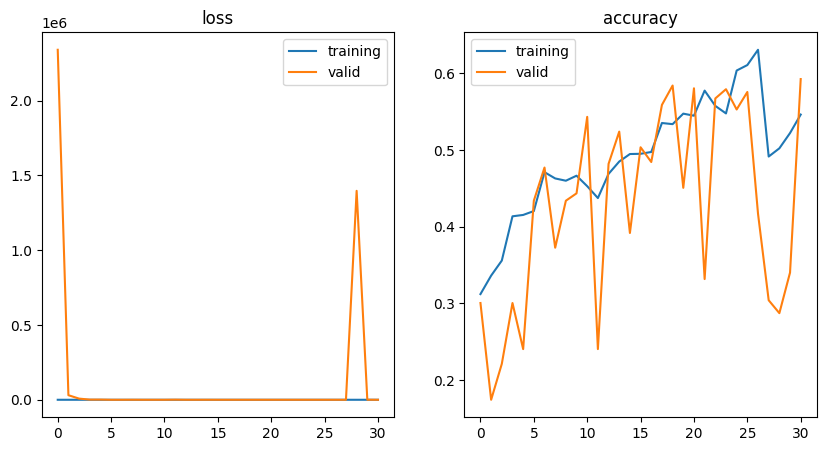

In [9]:
import matplotlib.pyplot as plt
metrics = ['loss', 'accuracy']  # 使用する評価関数を指定
plt.figure(figsize=(10, 5))  # グラフを表示するスペースを用意

for i in range(len(metrics)):

    metric = metrics[i]

    plt.subplot(1, 2, i+1)  # figureを1×2のスペースに分ける
    plt.title(metric)

    plt_train = log.history[metric]
    plt_valid  = log.history['val_' + metric]

    plt.plot(plt_train, label='training')
    plt.plot(plt_valid, label='valid')
    plt.legend()

plt.savefig("metrics.jpg")

In [10]:
# 評価する。
test_loss, test_acc = model.evaluate(val_generator)

print(f"test loss: {test_loss:.2f}, test accuracy: {test_acc:.2%}")

27/27 [==============================] - 17s 631ms/step - loss: 1.3783 - accuracy: 0.5917
test loss: 1.38, test accuracy: 59.17%
